In [1]:
import numpy as np
import pandas as pd

In [103]:
dict1 = { 'Country' : ['Belgium','India','Brazil'],
          'Capital' : ['Brussles','New Delhi','Brasilia'],
          'Population':[11190846, 1303171035, 207847528]
        }

In [104]:
df = pd.DataFrame(dict1, columns = ['Country', 'Capital', 'Population'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Country       3 non-null object
Capital       3 non-null object
Population    3 non-null int64
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [9]:
df.head()

,Country,Capital,Population
0,Belgium,Brussles,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528


In [11]:
df1 = pd.read_csv('house.csv')

In [20]:
df2 = pd.read_csv('house.csv', header = None, nrows =5) 
# header= None   will include header in data to be a part of dataframe data AND nrows will only load defined # of rows into dataframe
# header = None   can be used when we dont have any header in the input

In [21]:
df2.head(20)

,0,1,2
0,SNO,Square_Feet,Price
1,1,150,6450
2,2,200,7450
3,3,250,8450
4,4,300,9450


In [35]:
df3 = pd.read_csv('house1.csv', header = None, names = ['Sno','Square_Feet','Feet'], index_col = 'Sno')

In [170]:
dff1 = df3.rename(index = str, columns = {"Sno":"SerialNo","Square_Feet":"SqFt","Feet":"Ft"})

In [173]:
dff1.head(20)

,SqFt,Ft
Sno,,
1,150.0,6450
2,200.0,7450
3,250.0,8450
4,300.0,9450
5,NaN,11450
6,400.0,15450
7,600.0,18450


In [182]:
dff1.loc[:,(dff1>=600).all()]

,Ft
Sno,
1,6450
2,7450
3,8450
4,9450
5,11450
6,15450
7,18450


In [188]:
dff1.loc[:,dff1.isnull().any()]

,SqFt
Sno,
1,150.0
2,200.0
3,250.0
4,300.0
5,NaN
6,400.0
7,600.0


In [185]:
dff1.loc[:,dff1.notnull().all()]

,Ft
Sno,
1,6450
2,7450
3,8450
4,9450
5,11450
6,15450
7,18450


In [36]:
df3.head(20)

,Square_Feet,Feet
Sno,,
1,150.0,6450
2,200.0,7450
3,250.0,8450
4,300.0,9450
5,NaN,11450
6,400.0,15450
7,600.0,18450


In [13]:
df1.head(20)

,SNO,Square_Feet,Price
0,1,150.0,6450
1,2,200.0,7450
2,3,250.0,8450
3,4,300.0,9450
4,5,NaN,11450
5,6,400.0,15450
6,7,600.0,18450


In [39]:
df.head()

,Country,Capital,Population
0,Belgium,Brussles,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528


In [40]:
df['Capital']

0     Brussles
1    New Delhi
2     Brasilia
Name: Capital, dtype: object

In [43]:
df.iloc[1]

Country            India
Capital        New Delhi
Population    1303171035
Name: 1, dtype: object

In [44]:
df.iloc[1][1]

'New Delhi'

In [72]:
df.iloc[:,-1]

0      11190846
1    1303171035
2     207847528
Name: Population, dtype: int64

In [61]:
df.iloc[:,:2]

,Country,Capital
0,Belgium,Brussles
1,India,New Delhi
2,Brazil,Brasilia


In [64]:
df.loc[:,('Country','Capital')]

,Country,Capital
0,Belgium,Brussles
1,India,New Delhi
2,Brazil,Brasilia


In [76]:
df.loc[:,'Population']

0      11190846
1    1303171035
2     207847528
Name: Population, dtype: int64

In [92]:
ctr = df[(df['Population'] < 11190849) | (df['Population'] > 207847529) ].['Country']
print(ctr)

0    Belgium
1      India
Name: Country, dtype: object


In [93]:
ctr = df[(df.Population < 11190849) | (df.Population > 207847529) ].Country
print(ctr)

0    Belgium
1      India
Name: Country, dtype: object


In [96]:
chg = df[df.Capital == 'New Delhi'].Capital = 'Delhi'
print(chg)

Delhi


C:\Users\shash\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [213]:
#dff2 = df.Capital.isin(['New Delhi'])
#df[dff2]
df[df.Capital.isin(['New Delhi'])]

,Country,Capital,Population,DoublePopu,TriplePopu1
1,India,New Delhi,1303171035,2606342070,3909513105


In [225]:
df.filter(like='opu',axis=1)

,Population,DoublePopu,TriplePopu1
0,11190846,22381692,33572538
1,1303171035,2606342070,3909513105
2,207847528,415695056,623542584


In [255]:
#where query
df.where(df.Population >  11190846)

,Country,Capital,Population,DoublePopu,TriplePopu1
0,NaN,NaN,NaN,NaN,NaN
1,India,New Delhi,1.303171e+09,2.606342e+09,3.909513e+09
2,Brazil,Brasilia,2.078475e+08,4.156951e+08,6.235426e+08


In [256]:
df.where(df.Population >  11190846).dropna()

,Country,Capital,Population,DoublePopu,TriplePopu1
1,India,New Delhi,1.303171e+09,2.606342e+09,3.909513e+09
2,Brazil,Brasilia,2.078475e+08,4.156951e+08,6.235426e+08


In [230]:
df.Country.unique()

array(['Belgium', 'India', 'Brazil'], dtype=object)

In [232]:
df.duplicated('Country')

0    False
1    False
2    False
dtype: bool

In [244]:
#grouping data
df1['AreaCode'] = [22,11,22,23,33,44,22]
df1

,SNO,Square_Feet,Price,AreaCode
0,1,150.0,6450,22
1,2,200.0,7450,11
2,3,250.0,8450,22
3,4,300.0,9450,23
4,5,NaN,11450,33
5,6,400.0,15450,44
6,7,600.0,18450,22


In [245]:
df1.groupby(by=['AreaCode']).mean()

,SNO,Square_Feet,Price
AreaCode,,,
11,2.000000,200.000000,7450.000000
22,3.666667,333.333333,11116.666667
23,4.000000,300.000000,9450.000000
33,5.000000,NaN,11450.000000
44,6.000000,400.000000,15450.000000


In [253]:
df1.groupby(by='AreaCode').get_group(22)

,SNO,Square_Feet,Price,AreaCode
0,1,150.0,6450,22
2,3,250.0,8450,22
6,7,600.0,18450,22


In [251]:
df1.groupby(by=['AreaCode','SNO']).first()
#df1.groupby(level=0).sum()

Square_Feet  Price
AreaCode SNO                    
11       2          200.0   7450
22       1          150.0   6450
         3          250.0   8450
         7          600.0  18450
23       4          300.0   9450
33       5            NaN  11450
44       6          400.0  15450

In [257]:
# fill missing values
df1.Square_Feet.fillna(df1.Square_Feet.mean())

0    150.000000
1    200.000000
2    250.000000
3    300.000000
4    316.666667
5    400.000000
6    600.000000
Name: Square_Feet, dtype: float64

In [99]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
pd.read_sql(" sql stmnt ", engine)

In [105]:
#df.drop('Country',axis=1)
df

,Country,Capital,Population
0,Belgium,Brussles,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528


In [106]:
df.sort_index()

,Country,Capital,Population
0,Belgium,Brussles,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528


In [116]:
df.Country.value_counts()   # gives # of times a entry is present in that series in descending order

India      1
Belgium    1
Brazil     1
Name: Country, dtype: int64

In [117]:
df.sort_values(by='Country')    # sorting whole DataFrame by Country series

,Country,Capital,Population
0,Belgium,Brussles,11190846
2,Brazil,Brasilia,207847528
1,India,New Delhi,1303171035


In [119]:
df.Country.sort_values()        # sorting Country series

0    Belgium
2     Brazil
1      India
Name: Country, dtype: object

In [120]:
df.rank()

,Country,Capital,Population
0,1.0,2.0,1.0
1,3.0,3.0,3.0
2,2.0,1.0,2.0


In [121]:
df.count()                  # gives non-NA value count

Country       3
Capital       3
Population    3
dtype: int64

In [123]:
df.columns

Index(['Country', 'Capital', 'Population'], dtype='object')

In [124]:
df.shape

(3, 3)

In [133]:
df.Population.max()

1303171035

In [137]:
df.Population.describe()

count    3.000000e+00
mean     5.074031e+08
std      6.961346e+08
min      1.119085e+07
25%      1.095192e+08
50%      2.078475e+08
75%      7.555093e+08
max      1.303171e+09
Name: Population, dtype: float64

In [147]:
df['DoublePopu'] = df.Population.apply(lambda x:x*2)

In [148]:
df.DoublePopu

0      22381692
1    2606342070
2     415695056
Name: DoublePopu, dtype: int64

In [151]:
df['TriplePopu1'] = df.apply(lambda x:x['Population']*3,axis=1)

In [152]:
df

,Country,Capital,Population,DoublePopu,TriplePopu1
0,Belgium,Brussles,11190846,22381692,33572538
1,India,New Delhi,1303171035,2606342070,3909513105
2,Brazil,Brasilia,207847528,415695056,623542584


In [154]:
df.drop(['DoublePopu','TriplePopu1'],axis=1)

,Country,Capital,Population
0,Belgium,Brussles,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528


In [158]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])

In [155]:
 s3 = pd.Series([7, -2, 3], index=['a', 'c', 'd'])

In [159]:
s + s3

a    10.0
b     NaN
c     5.0
d     7.0
dtype: float64

In [166]:
s.add(s3,fill_value=-1)

a    10.0
b    -6.0
c     5.0
d     7.0
dtype: float64

In [162]:
s.sub(s3,fill_value=0)

a   -4.0
b   -5.0
c    9.0
d    1.0
dtype: float64

In [163]:
s.div(s3,fill_value=0)

a    0.428571
b        -inf
c   -3.500000
d    1.333333
dtype: float64

In [164]:
s.mul(s3,fill_value=0)

a    21.0
b    -0.0
c   -14.0
d    12.0
dtype: float64

In [167]:
# --------------------------- second part -  JOINs---------------------

In [5]:
# combining data
import numpy as np
import pandas as pd

In [25]:
dictEmp = { 'EmpId' : [21,22,23,24,25,26,27],
          'Name' : ['Alize','Bella','Cathy','Denise','Elizabeth','Faith','Gissle'],
          'Salary' : [220,250,110,350,400,150,401]
        } 

In [26]:
dictEmpP = { 'EmpId' : [21,22,23,24,25,27],
          'Mobile' : [991108,991101,991112,991100,991190,991189],
          'Country' : ['Armenia','Belgium','Canada','Denmark','Estonia','Grenada']
        } 

In [27]:
dfEmp = pd.DataFrame(dictEmp)
dfEmpP = pd.DataFrame(dictEmpP)

In [13]:
dfEmp.head(10)

,EmpId,Name,Salary
0,21,Alize,220
1,22,Bella,250
2,23,Cathy,110
3,24,Denise,350
4,25,Elizabeth,400
5,26,Faith,150
6,27,Gissle,401


In [14]:
dfEmpP.head(10)

,EmpId,Mobile,Country
0,21,991108,Armenia
1,22,991101,Belgium
2,23,991112,Canada
3,24,991100,Denmark
4,25,991190,Estonia
5,27,991189,Grenada


In [15]:
pd.merge(dfEmp,dfEmpP,how ='left', on='EmpId')          # left join

,EmpId,Name,Salary,Mobile,Country
0,21,Alize,220,991108.0,Armenia
1,22,Bella,250,991101.0,Belgium
2,23,Cathy,110,991112.0,Canada
3,24,Denise,350,991100.0,Denmark
4,25,Elizabeth,400,991190.0,Estonia
5,26,Faith,150,NaN,NaN
6,27,Gissle,401,991189.0,Grenada


In [16]:
pd.merge(dfEmp,dfEmpP, how='right', on='EmpId')    # right join 

,EmpId,Name,Salary,Mobile,Country
0,21,Alize,220,991108,Armenia
1,22,Bella,250,991101,Belgium
2,23,Cathy,110,991112,Canada
3,24,Denise,350,991100,Denmark
4,25,Elizabeth,400,991190,Estonia
5,27,Gissle,401,991189,Grenada


In [17]:
pd.merge(dfEmp, dfEmpP, how='inner', on='EmpId')    # comman data of both df s

,EmpId,Name,Salary,Mobile,Country
0,21,Alize,220,991108,Armenia
1,22,Bella,250,991101,Belgium
2,23,Cathy,110,991112,Canada
3,24,Denise,350,991100,Denmark
4,25,Elizabeth,400,991190,Estonia
5,27,Gissle,401,991189,Grenada


In [18]:
pd.merge(dfEmp, dfEmpP, how ='outer',on='EmpId')    # all data of both df s

,EmpId,Name,Salary,Mobile,Country
0,21,Alize,220,991108.0,Armenia
1,22,Bella,250,991101.0,Belgium
2,23,Cathy,110,991112.0,Canada
3,24,Denise,350,991100.0,Denmark
4,25,Elizabeth,400,991190.0,Estonia
5,26,Faith,150,NaN,NaN
6,27,Gissle,401,991189.0,Grenada


In [ ]:
# -------------------------------- JOIN ------------------------------------------- 

In [36]:
# using 'join' word
dfEmp.join(dfEmpP, how ='right', on ='EmpId', lsuffix ='_left', rsuffix='_right')

,EmpId,EmpId_left,Name,Salary,EmpId_right,Mobile,Country
6,0,NaN,NaN,NaN,21,991108,Armenia
6,1,NaN,NaN,NaN,22,991101,Belgium
6,2,NaN,NaN,NaN,23,991112,Canada
6,3,NaN,NaN,NaN,24,991100,Denmark
6,4,NaN,NaN,NaN,25,991190,Estonia
6,5,NaN,NaN,NaN,27,991189,Grenada


In [38]:
# 'join' not able to find the common EmpId s to join the data
dfEmp.join(dfEmpP, how ='outer', on ='EmpId', lsuffix ='_left', rsuffix='_right')

,EmpId,EmpId_left,Name,Salary,EmpId_right,Mobile,Country
0,21,21.0,Alize,220.0,NaN,NaN,NaN
1,22,22.0,Bella,250.0,NaN,NaN,NaN
2,23,23.0,Cathy,110.0,NaN,NaN,NaN
3,24,24.0,Denise,350.0,NaN,NaN,NaN
4,25,25.0,Elizabeth,400.0,NaN,NaN,NaN
5,26,26.0,Faith,150.0,NaN,NaN,NaN
6,27,27.0,Gissle,401.0,NaN,NaN,NaN
6,0,NaN,NaN,NaN,21.0,991108.0,Armenia
6,1,NaN,NaN,NaN,22.0,991101.0,Belgium
6,2,NaN,NaN,NaN,23.0,991112.0,Canada


In [ ]:
# ------------------------------- concatenate ---------------------------

In [39]:
print(dfEmp)
print(dfEmpP)

   EmpId       Name  Salary
0     21      Alize     220
1     22      Bella     250
2     23      Cathy     110
3     24     Denise     350
4     25  Elizabeth     400
5     26      Faith     150
6     27     Gissle     401
   EmpId  Mobile  Country
0     21  991108  Armenia
1     22  991101  Belgium
2     23  991112   Canada
3     24  991100  Denmark
4     25  991190  Estonia
5     27  991189  Grenada


In [50]:
pd.concat([dfEmp,dfEmpP], axis=1, join='inner')

,EmpId,Name,Salary,EmpId,Mobile,Country
0,21,Alize,220,21,991108,Armenia
1,22,Bella,250,22,991101,Belgium
2,23,Cathy,110,23,991112,Canada
3,24,Denise,350,24,991100,Denmark
4,25,Elizabeth,400,25,991190,Estonia
5,26,Faith,150,27,991189,Grenada


In [57]:
pd.concat([dfEmp,dfEmpP], axis=1, join='inner')#, ignore_index=True)

,EmpId,Name,Salary,EmpId,Mobile,Country
0,21,Alize,220,21,991108,Armenia
1,22,Bella,250,22,991101,Belgium
2,23,Cathy,110,23,991112,Canada
3,24,Denise,350,24,991100,Denmark
4,25,Elizabeth,400,25,991190,Estonia
5,26,Faith,150,27,991189,Grenada


In [49]:
# APPEND
dfEmp.append(dfEmpP)

C:\Users\shash\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Country,EmpId,Mobile,Name,Salary
0,NaN,21,NaN,Alize,220.0
1,NaN,22,NaN,Bella,250.0
2,NaN,23,NaN,Cathy,110.0
3,NaN,24,NaN,Denise,350.0
4,NaN,25,NaN,Elizabeth,400.0
5,NaN,26,NaN,Faith,150.0
6,NaN,27,NaN,Gissle,401.0
0,Armenia,21,991108.0,NaN,NaN
1,Belgium,22,991101.0,NaN,NaN
2,Canada,23,991112.0,NaN,NaN


In [58]:
#--------------------------------------------------------------------------------

In [59]:
import matplotlib.pyplot as plt

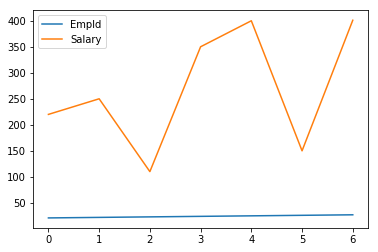

In [62]:
dfEmp.plot()

In [64]:
#-------------------------------------------------------------DATES ----------------------------------------------------

In [65]:
#-----------------------------------------------------------------------

In [75]:
dictB = {'Date': ['2016-03-01','2016-03-02','2016-03-01','2016-03-03','2016-03-02','2016-03-03'],
         'Type': ['a','b','c','a','a','c'],
         'Value': [11.432,13.031,20.784,99.906,1.303,20.784]
        }

In [109]:
dfB = pd.DataFrame(dictB)
dfA = dfB

In [110]:
dfB.head(10)

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [79]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Date     6 non-null object
Type     6 non-null object
Value    6 non-null float64
dtypes: float64(1), object(2)
memory usage: 224.0+ bytes


In [81]:
dfB['Date']= pd.to_datetime(dfB['Date'])  ## convert Date dtype-object to dtype-datetime 
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Date     6 non-null datetime64[ns]
Type     6 non-null object
Value    6 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 224.0+ bytes


In [83]:
dfB['Date']= pd.date_range('2000-1-1', periods=6, freq='M')
dfB['Date']

0   2000-01-31
1   2000-02-29
2   2000-03-31
3   2000-04-30
4   2000-05-31
5   2000-06-30
Name: Date, dtype: datetime64[ns]

In [93]:
import datetime as dt
dates = [dt.datetime(2012,5,1), dt.datetime(2012,5,2)]
dates

[datetime.datetime(2012, 5, 1, 0, 0), datetime.datetime(2012, 5, 2, 0, 0)]

In [94]:
index = pd.DatetimeIndex(dates)
index

DatetimeIndex(['2012-05-01', '2012-05-02'], dtype='datetime64[ns]', freq=None)

In [95]:
index = pd.date_range(dt.datetime(2012,2,1), end = ('2012-10-19') , freq='BM')
index

DatetimeIndex(['2012-02-29', '2012-03-30', '2012-04-30', '2012-05-31',
               '2012-06-29', '2012-07-31', '2012-08-31', '2012-09-28'],
              dtype='datetime64[ns]', freq='BM')

In [101]:
index1 = pd.date_range('2020-4-4', periods = 5, freq='BM')
index1

DatetimeIndex(['2020-04-30', '2020-05-29', '2020-06-30', '2020-07-31',
               '2020-08-31'],
              dtype='datetime64[ns]', freq='BM')

In [102]:
index2 = pd.date_range(dt.datetime(2012,2,1), periods = 5, freq='M')
index2

DatetimeIndex(['2012-02-29', '2012-03-31', '2012-04-30', '2012-05-31',
               '2012-06-30'],
              dtype='datetime64[ns]', freq='M')

In [116]:
# --------------------------------------------------------------------------------------------------------- 

In [112]:
dates = [pd.Timestamp('2012-05-01'), pd.Timestamp('2012-05-02'), pd.Timestamp('2012-05-03')]

In [126]:
ts = pd.Series(np.random.randn(3), dates)

In [127]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [128]:
ts.index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)

In [129]:
ts

2012-05-01   -0.728773
2012-05-02   -0.291671
2012-05-03    0.478351
dtype: float64

In [ ]:
#-----------------------------------------------------------------

In [130]:
dfA.head()

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303


In [133]:
dfA['Date']=pd.to_datetime(dfA['Date'])
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Date     6 non-null datetime64[ns]
Type     6 non-null object
Value    6 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 224.0+ bytes


In [136]:
dfA.set_index('Date',inplace=True)

In [138]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2016-03-01 to 2016-03-03
Data columns (total 2 columns):
Type     6 non-null object
Value    6 non-null float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


In [139]:
dfA.head()

,Type,Value
Date,,
2016-03-01,a,11.432
2016-03-02,b,13.031
2016-03-01,c,20.784
2016-03-03,a,99.906
2016-03-02,a,1.303


In [142]:
dfA['2016-03-02']

,Type,Value
Date,,
2016-03-02,b,13.031
2016-03-02,a,1.303


In [111]:
#----------------------------------------------------------------------------

In [106]:
dfA.head()

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303


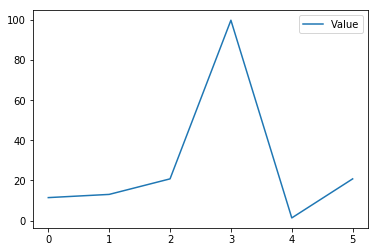

In [107]:
dfA.plot()

In [1]:
# ------------------------------ gapminder -------------------------

In [2]:
import pandas as pd
df_gap = pd.read_csv('gapminder-FiveYearData.txt')

In [54]:
df_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
year         1704 non-null int64
pop          1704 non-null float64
continent    1704 non-null object
lifeExp      1704 non-null float64
gdpPercap    1704 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [55]:
df_gap.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [56]:
df_gap['country'].dtypes

dtype('O')

In [57]:
type(df_gap)

pandas.core.frame.DataFrame

In [58]:
df_gap.dtypes

country       object
year           int64
pop          float64
continent     object
lifeExp      float64
gdpPercap    float64
dtype: object

In [59]:
df_gap.shape

(1704, 6)

In [60]:
df_gap.size

10224

In [61]:
df_gap.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [62]:
df_gap.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [63]:
pd.__version__

'0.23.4'

In [64]:
df_gap[df_gap['country'].isin(['Afghanistan'])]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


In [68]:
df_gap.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

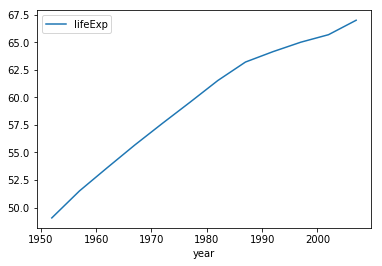

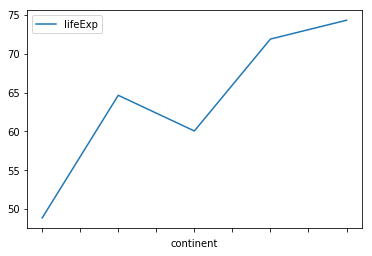

In [77]:
(df_gap
    .groupby(['year'])[['lifeExp']]
    .mean()
    .plot()
)
plt.show()
(df_gap
    .groupby(['continent'])[['lifeExp']]
    .mean()
    .plot()
)
plt.show()

In [78]:
#--------------- #

In [80]:
aa = pd.Series([2,3,4,5],index=list('abcd'),dtype='Int64')
aa

a    2
b    3
c    4
d    5
dtype: int64

In [82]:
aa.astype('Float64')

a    2.0
b    3.0
c    4.0
d    5.0
dtype: float64

In [84]:
ab = pd.Series([1,5,6],index=list('abc'),dtype='int64')
ab

a    1
b    5
c    6
dtype: int64

In [85]:
aa + ab

a     3.0
b     8.0
c    10.0
d     NaN
dtype: float64

In [86]:
slb = pd.Series({'a':8,'b':6,'c':7,'d':5})
slb

a    8
b    6
c    7
d    5
dtype: int64

In [87]:
slc = slb.astype('float64')
slc

a    8.0
b    6.0
c    7.0
d    5.0
dtype: float64

In [90]:
slc.array

AttributeError: 'Series' object has no attribute 'array'

In [92]:
s2 = pd.Series([6, 8, 7, 5], index=list('abcd'), dtype='Int64')

In [95]:
s2 > 6

a    False
b     True
c     True
d    False
dtype: bool

In [3]:
df_gap.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [5]:
df_gap.describe(include=['object'])

,country,continent
count,1704,1704
unique,142,5
top,Angola,Africa
freq,12,624


In [2]:
# --------------------------- playing with indexes ------------------------- #

In [5]:
import numpy as np
import pandas as pd

df_A = pd.DataFrame(np.random.rand(5,2))
df_A

,0,1
0,0.572394,0.595789
1,0.080995,0.541572
2,0.003203,0.929074
3,0.586283,0.011034
4,0.451278,0.432518


In [6]:
df_A.index = ['row_' + str(i) for i in range(1,6)]
df_A

,0,1
row_1,0.572394,0.595789
row_2,0.080995,0.541572
row_3,0.003203,0.929074
row_4,0.586283,0.011034
row_5,0.451278,0.432518


In [3]:
# example 2 --
import pandas as pd
import numpy as np
ufo = pd.read_csv('http://bit.ly/uforeports')

In [8]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [12]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null object
dtypes: object(5)
memory usage: 712.6+ KB


In [17]:
# slicing and object field by converting to string  type and chaging then to int type
ufo['Time'].str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [20]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [22]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.6+ KB


In [23]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [30]:
print(ufo.Time.dt.date.head())
#print(ufo.Time.dt.time.head())

0    1930-06-01
1    1930-06-30
2    1931-02-15
3    1931-06-01
4    1933-04-18
Name: Time, dtype: object


In [34]:
ts = pd.to_datetime('1/21/1998')

In [35]:
print(ufo.loc[ufo.Time > ts].head())

                 City Colors Reported Shape Reported State                Time
11138       Goldsboro             NaN      FORMATION    NC 1998-01-21 22:00:00
11139        Holstein             NaN       TRIANGLE    NE 1998-01-23 18:05:00
11140        Alberton             NaN         CIRCLE    MT 1998-01-23 21:00:00
11141         Kaneohe             NaN       TRIANGLE    HI 1998-01-24 05:45:00
11142  San Bernardino             NaN         SPHERE    CA 1998-01-24 09:30:00


In [37]:
ufo.head(6)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00


In [43]:
ufo1 = ufo.set_index('Time').head()
ufo1

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [44]:
ufo1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 1930-06-01 22:00:00 to 1933-04-18 19:00:00
Data columns (total 4 columns):
City               5 non-null object
Colors Reported    0 non-null object
Shape Reported     5 non-null object
State              5 non-null object
dtypes: object(4)
memory usage: 200.0+ bytes


In [45]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.6+ KB


In [47]:
ufo1.head(10)

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [51]:
ufo1[ufo1.index > '1/21/1931']

,City,Colors Reported,Shape Reported,State
Time,,,,
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [52]:
ufo['Year'] = ufo.Time.dt.year

In [53]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [73]:
ufo.Year.value_counts().sort_index(ascending=False).head()

2000    2635
1999    2774
1998    1743
1997    1237
1996     851
Name: Year, dtype: int64

In [74]:
ufo.Year.value_counts().sort_values(ascending=False).head()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
Name: Year, dtype: int64

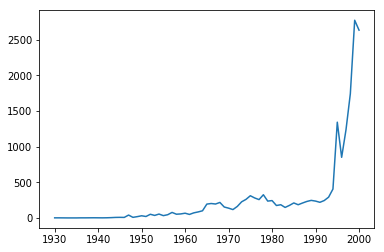

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
ufo.Year.value_counts().sort_index().plot()

In [76]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 6 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null datetime64[ns]
Year               18241 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 855.1+ KB


In [77]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [79]:
ufo['Hour'] = ufo.Time.dt.hour
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Hour
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,22
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,20
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,14
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,13
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,19


In [175]:
#ufo.State.value_counts().head(10)
#ufo[ufo.State == 'CA'].City.value_counts().head(10) ufo.City.value_counts()
#ufo.groupby('City').count()
#ufo.loc[ufo.City == 'San Diego'].City.count()
#ufo.groupby(['City'])['Hour'].value_counts()
#ufo.Hour.value_counts().head(6) ufo.drop('Count',axis=1)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Hour,Count
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,22,NaN
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,20,NaN
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,14,NaN
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,13,NaN
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,19,NaN


In [177]:
del ufo['Count']
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Hour
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,22
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,20
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,14
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,13
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,19


In [203]:
#ufocit = 
#ufo.groupby('City')['Hour'].count()
#ufocit.sort_values(ascending=False)
#ufocit[ufocit.sort_values(ascending=False)].value_counts()

In [219]:
#ufo.groupby(['Year','Hour'])['State'].count()

In [229]:
ufo.loc[ufo['City'].value_counts(ascending=False)]

,City,Colors Reported,Shape Reported,State,Time,Year,Hour
187,Chester,NaN,OVAL,PA,1952-06-22 17:45:00,1952,17
161,Atlanta,NaN,NaN,GA,1951-07-01 14:00:00,1951,14
137,Florence,NaN,LIGHT,CO,1950-06-30 17:30:00,1950,17
108,Booneville,NaN,NaN,MS,1949-07-15 20:30:00,1949,20
105,Salem,NaN,CIGAR,OR,1949-06-30 21:00:00,1949,21
102,Los Angeles,NaN,CIRCLE,CT,1949-06-04 10:00:00,1949,10
101,Grays,NaN,LIGHT,SC,1949-05-15 06:30:00,1949,6
98,Sharpsburg,NaN,CIRCLE,MD,1948-12-12 23:30:00,1948,23
73,Roswell,NaN,NaN,NM,1947-07-11 00:00:00,1947,0
62,Tacoma,NaN,OTHER,WA,1947-06-30 00:00:00,1947,0


In [244]:
ufo.State.unique()

array(['NY', 'NJ', 'CO', 'KS', 'ND', 'CA', 'MI', 'AK', 'OR', 'AL', 'SC',
       'IA', 'GA', 'TN', 'NE', 'LA', 'KY', 'WV', 'NM', 'UT', 'RI', 'FL',
       'VA', 'NC', 'TX', 'WA', 'ME', 'IL', 'AZ', 'OH', 'PA', 'MN', 'WI',
       'MD', 'SD', 'NV', 'ID', 'MO', 'OK', 'IN', 'CT', 'MS', 'AR', 'WY',
       'MA', 'MT', 'DE', 'NH', 'VT', 'HI', 'Ca', 'Fl'], dtype=object)

In [4]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [5]:
ufo.City.unique()

array(['Ithaca', 'Willingboro', 'Holyoke', ..., 'Capitola', 'Grant Park',
       'Ybor'], dtype=object)

In [14]:
ufo_time_cnt31 = ufo.Time.str.contains('1931').sum()
print(ufo_time_cnt31)
ufo_time_cnt43 = ufo.Time.str.contains('1943').sum()
print(ufo_time_cnt43)

descriptor_counts = pd.Series([ufo_time_cnt31, ufo_time_cnt43], index=['tropical', 'fruity'])
descriptor_counts

2
5


tropical    2
fruity      5
dtype: int64

In [18]:
ufo_time_cnt31 = ufo.Time.map(lambda x: "1931" in x).sum()
print(ufo_time_cnt31)
ufo_time_cnt43 = ufo.Time.map(lambda x: "1943" in x).sum()
print(ufo_time_cnt43)
desciptor_counts1 = pd.Series([ufo_time_cnt31, ufo_time_cnt43],index=['tropical', 'fruity'])
print(desciptor_counts1)

2
5
tropical    2
fruity      5
dtype: int64


In [19]:
'''We'd like to host these wine reviews on our website, but a rating system ranging from 80 to 100 points is too hard to understand - we'd like to translate them into simple star ratings. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.

Also, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.

Create a series star_ratings with the number of stars corresponding to each review in the dataset.'''

"We'd like to host these wine reviews on our website, but a rating system ranging from 80 to 100 points is too hard to understand - we'd like to translate them into simple star ratings. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.\n\nAlso, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.\n\nCreate a series star_ratings with the number of stars corresponding to each review in the dataset."

In [20]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [36]:
ufo.groupby('City').apply(lambda x:x.Time.iloc[0])

City
Abbeville                               12/10/1968 0:30
Aberdeen                               11/15/1956 18:30
Abilene                                  6/1/1931 13:00
Abingdon                                7/15/1991 23:00
Acampo                                  9/25/1998 20:00
Accokeek                                8/24/1989 23:45
Accord                                  6/20/1977 20:30
Acoma                                   5/15/1962 21:00
Acton                                   10/1/1984 21:00
Acton to Chelmsford                      5/10/1992 9:45
Acworth                                  7/15/1995 5:30
Ada                                     5/17/1956 10:22
Adair County                            6/19/1995 22:00
Adak                                      6/1/1986 0:00
Adams                                   8/24/2000 22:14
Adamsville                               8/25/1995 0:40
Addison                                   6/4/1995 0:00
Addy                                    4/2

In [33]:
def stars(row):
    if row.State == 'NY':
        return 1
    elif row.State == 'NJ':
        return 2
    elif row.City == 'Holyoke':
        return 3
    else:
        return 0

ufo_star = ufo.apply(stars, axis='columns')
ufo_star


0        1
1        2
2        3
3        0
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
18211    3
18212    0
18213    0
18214    0
18215    0
18216    0
18217    0
18218    0
18219    0
18220    0
18221    0
18222    0
18223    0
18224    0
18225    0
18226    0
18227    0
18228    0
18229    0
18230    0
18231    0
18232    0
18233    0
18234    0
18235    0
18236    0
18237    0
18238    0
18239    0
18240    0
Length: 18241, dtype: int64

In [37]:
#-------------------------- winemag data practice --------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
reviews = pd.read_csv('winemag-data-130k-v2.csv')

In [4]:
reviews.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [46]:
del reviews['Unnamed: 0']
reviews.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [56]:
#revA1 = 
reviews.groupby('points').price.mean()
#round(revA1,2)

points
80      16.372152
81      17.182353
82      18.870767
83      18.237353
84      19.310215
85      19.949562
86      22.133759
87      24.901884
88      28.687523
89      32.169640
90      36.906622
91      43.224252
92      51.037763
93      63.112216
94      81.436938
95     109.235420
96     159.292531
97     207.173913
98     245.492754
99     284.214286
100    485.947368
Name: price, dtype: float64

In [57]:
reviews.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [61]:
# best wine from country & province
reviews.groupby(['country','province']).apply(lambda df:df.loc[df.points.idxmax()])

C:\Users\shash\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4315: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  stacked_values = np.vstack(map(np.asarray, values))


country  \
country   province                         
Argentina Mendoza Province     Argentina   
          Other                Argentina   
Armenia   Armenia                Armenia   
Australia Australia Other      Australia   
          New South Wales      Australia   
          South Australia      Australia   
          Tasmania             Australia   
          Victoria             Australia   
          Western Australia    Australia   
Austria   Austria                Austria   
          Burgenland             Austria   
          Carnuntum              Austria   
          Eisenberg              Austria   
          Kamptal                Austria   
          Kremstal               Austria   
          Leithaberg             Austria   
          Mittelburgenland       Austria   
          Neusiedlersee          Austria   
          Niederösterreich       Austria   
          Steiermark             Austria   
          Südburgenland          Austria   
          Südoststeiermark       Austria   
          Südsteiermark          Austria   
          Thermenregion          Austria   
          Traisental             Austria   
          Vienna                 Austria   
          Wachau                 Austria   
          Wagram                 Austria   
          Wagram-Donauland       Austria   
          Weinland Österreich    Austria   
...                                  ...   
US        Hawaii                      US   
          Idaho                       US   
          Illinois                    US   
          Iowa                        US   
          Kentucky                    US   
          Massachusetts               US   
          Michigan                    US   
          Missouri                    US   
          Nevada                      US   
          New Jersey                  US   
          New Mexico                  US   
          New York                    US   
          North Carolina              US   
          Ohio                        US   
          Oregon                      US   
          Pennsylvania                US   
          Rhode Island                US   
          Texas                       US   
          Vermont                     US   
          Virginia                    US   
          Washington                  US   
          Washington-Oregon           US   
Ukraine   Ukraine                Ukraine   
Uruguay   Atlantida              Uruguay   
          Canelones              Uruguay   
          Juanico                Uruguay   
          Montevideo             Uruguay   
          Progreso               Uruguay   
          San Jose               Uruguay   
          Uruguay                Uruguay   

                                                                     description  \
country   province                                                                 
Argentina Mendoza Province     If the color doesn't tell the full story, the ...   
          Other                Take note, this could be the best wine Colomé ...   
Armenia   Armenia              Deep salmon in color, this wine offers a bouqu...   
Australia Australia Other      Writes the book on how to make a wine filled w...   
          New South Wales      De Bortoli's Noble One is as good as ever in 2...   
          South Australia      This inky, embryonic wine deserves to be cella...   
          Tasmania             The Pinot Noir is no slouch either, but Tolpud...   
          Victoria             This wine contains some material over 100 year...   
          Western Australia    Perhaps the best young wine I've tasted from M...   
Austria   Austria              The pair to this wine is Nummer 3 in the Krach...   
          Burgenland           Opulent honey and lemon aromas waft from the g...   
          Carnuntum            Very pure and lifted notes of red cherry are h...   
          Eisenberg            Dark red and black-cherry fruit is clothed in ...   


In [67]:
# 
#reviews.groupby('country').price.agg([len,min,max])
reviews.loc[reviews.price.max()]['country']  # country having costiliest wine 

'South Africa'

In [75]:
reviews.groupby('taster_twitter_handle').taster_twitter_handle.count().sort_values(ascending=False)
#reviews.groupby('taster_name').taster_name.count().sort_values(ascending=False)

taster_twitter_handle
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [79]:
best_rating_per_price = reviews.groupby('price')['points'].max()price_extremes = reviews.groupby('variety').price.agg(['min','max']).sort_index()
best_rating_per_price

price
4.0        86
5.0        87
6.0        88
7.0        91
8.0        91
9.0        91
10.0       91
11.0       92
12.0       93
13.0       94
14.0       94
15.0       93
16.0       94
17.0       93
18.0       94
19.0       94
20.0       96
21.0       94
22.0       95
23.0       94
24.0       95
25.0       95
26.0       95
27.0       96
28.0       96
29.0       96
30.0       96
31.0       95
32.0       96
33.0       94
         ... 
698.0      97
710.0      95
750.0      92
757.0      98
764.0      94
767.0      96
770.0      96
775.0      98
780.0      91
790.0      87
800.0      99
820.0      96
848.0     100
850.0      99
886.0      97
900.0      94
932.0      97
973.0      95
980.0      94
1000.0     97
1100.0     97
1125.0     94
1200.0     96
1300.0     96
1500.0    100
1900.0     98
2000.0     97
2013.0     91
2500.0     96
3300.0     88
Name: points, Length: 390, dtype: int64

In [81]:
price_extremes = reviews.groupby('variety').price.agg(['min','max'])
price_extremes

,min,max
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
Aglianico,6.0,180.0
Aidani,27.0,27.0
Airen,8.0,10.0
Albana,12.0,50.0
Albanello,20.0,20.0
Albariño,10.0,75.0
Albarossa,40.0,40.0


In [82]:
reviews.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [84]:
#reviews.groupby('taster_name')['points'].mean()

In [99]:
#reviews.groupby(['country','variety']).size().sort_values(ascending=False)
revA2 = reviews.groupby(['country','variety']).size().sort_values(ascending=False)
revA2

country     variety                   
US          Pinot Noir                    9885
            Cabernet Sauvignon            7315
            Chardonnay                    6801
France      Bordeaux-style Red Blend      4725
Italy       Red Blend                     3624
US          Syrah                         3244
            Red Blend                     2972
France      Chardonnay                    2808
Italy       Nebbiolo                      2736
US          Zinfandel                     2711
Portugal    Portuguese Red                2466
US          Merlot                        2311
Italy       Sangiovese                    2265
US          Sauvignon Blanc               2163
France      Pinot Noir                    1966
            Rosé                          1923
US          Bordeaux-style Red Blend      1824
Germany     Riesling                      1790
US          Riesling                      1753
Argentina   Malbec                        1510
Spain       Tempranil

In [100]:
reviews.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [5]:
reviews.points.median()

88.0

In [6]:
reviews.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [9]:
reviews_per_country = reviews.groupby('country')['variety'].count()
reviews_per_country 
#print(reviews.country.value_counts())

country
Argentina                  3800
Armenia                       2
Australia                  2329
Austria                    3345
Bosnia and Herzegovina        2
Brazil                       52
Bulgaria                    141
Canada                      257
Chile                      4471
China                         1
Croatia                      73
Cyprus                       11
Czech Republic               12
Egypt                         1
England                      74
France                    22093
Georgia                      86
Germany                    2165
Greece                      466
Hungary                     146
India                         9
Israel                      505
Italy                     19540
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1419
Peru                         16


In [10]:
reviews.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

In [11]:
#-------------------------------

In [14]:
centered_price = reviews.price - reviews.price.mean()
#centered_price = pd.Series(map(lambda x:x-reviews.price.mean(),reviews.price))
centered_price

0               NaN
1        -20.363389
2        -21.363389
3        -22.363389
4         29.636611
5        -20.363389
6        -19.363389
7        -11.363389
8        -23.363389
9         -8.363389
10       -16.363389
11        -5.363389
12        -1.363389
13              NaN
14       -23.363389
15       -11.363389
16        -5.363389
17       -22.363389
18        -7.363389
19        -3.363389
20       -12.363389
21       -15.363389
22       -16.363389
23       -13.363389
24        -0.363389
25        33.636611
26       -22.363389
27       -25.363389
28       -18.363389
29       -19.363389
            ...    
129941   -15.363389
129942    -0.363389
129943    -6.363389
129944   -10.363389
129945   -15.363389
129946   -18.363389
129947   -15.363389
129948     7.636611
129949    -0.363389
129950    -0.363389
129951    -5.363389
129952   -13.363389
129953   -10.363389
129954   -20.363389
129955     4.636611
129956   -16.363389
129957   -18.363389
129958    -0.363389
129959    21.636611


In [15]:
reviews.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


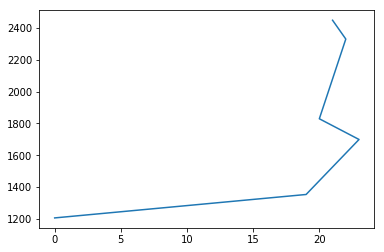

In [128]:
ufo.Hour.value_counts().head(6).plot()